In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# NEW SYNTAX FEATURE

In [2]:
# import nltk
# from nltk import pos_tag 
# nltk.download('averaged_perceptron_tagger')

In [3]:
# fake = pd.read_csv('Fake.csv')
# true = pd.read_csv('True.csv')

In [4]:
# print(true.iloc[1,0])

In [5]:
# tagged_fake_news_title = fake['title'].str.split().map(pos_tag) 
# tagged_true_news_title = true['title'].str.split().map(pos_tag) 

In [6]:
# print(tagged_true_news_title[1])

In [7]:
# def tags(titles):
#     entries = []
#     for entry in titles:
#         tag_string = ""
#         for pair in entry:
#             tag_string = tag_string + " " + pair[1]
#         entries.append(tag_string.lstrip())
#     return entries

In [8]:
# true_tags = tags(tagged_true_news_title)
# fake_tags = tags(tagged_fake_news_title)

In [78]:
# print(true_tags[1])

NNP JJ TO VB NN NNS IN NNP NNP


In [79]:
# print(fake_tags[1])

NNP NNP NNP NNP NNP NNP NNP NNP


In [80]:
# all_tags = true_tags + fake_tags

In [82]:
# all_tags

In [89]:
# import collections

In [91]:
# a_counter = collections.Counter(all_tags)
# most_common = a_counter.most_common(10)
# print(most_common)

[('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP', 94), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP', 75), ('NNP NNP NNP NNP NNP NNP NNP NNP', 66), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP', 63), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP', 56), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP', 53), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP', 52), ('NNP NNP NNP NNP NNP NNP NNP', 50), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NN', 45), ('NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NN', 44)]


In [94]:
# most_common[0][0]

'NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP'

In [115]:
# for i in range(0,10):
#     true = 0
#     for x in true_tags:
#         if x == most_common[i][0]:
#             true = true + 1
#     fake = 0
#     for x in fake_tags:
#         if x == most_common[i][0]:
#             fake = fake + 1

#     print(most_common[i][0])
#     print("True :" + str(true))
#     print("Fake :" + str(fake))
#     print("")

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :94

NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :75

NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :66

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :63

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :56

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :53

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :52

NNP NNP NNP NNP NNP NNP NNP
True :0
Fake :50

NNP NNP NNP NNP NNP NNP NNP NNP NNP NN
True :0
Fake :45

NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NN
True :0
Fake :44



In [97]:
# i = 0
# x = "NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP"
# if x in true_tags:
#     i = i + 1
# print(i)

0


In [83]:
# le = preprocessing.LabelEncoder()
# le.fit(all_tags)
# tags_encoded = le.transform(all_tags)

In [84]:
# tags_encoded

array([ 1745,  9176,  3856, ..., 12213, 36459,   273])

In [86]:
# le.inverse_transform([0, 0, 1, 2])

In [15]:
# np.savetxt("syntax.txt", tags_encoded, fmt="%s")

In [9]:
syntax = pd.read_csv("syntax.txt",header=None)

In [10]:
syntax

,0
0,1745
1,9176
2,3856
3,13660
4,7795
...,...
44893,15885
44894,18199
44895,12213
44896,36459


In [11]:
# true_syntax.plot(kind="bar")

# PICKLE FILES FEATURES

In [37]:
true = pd.read_pickle("Tagged_true_news_title.pickle")
fake = pd.read_pickle("Tagged_fake_news_title.pickle")

In [38]:
# true_trigrams = pd.read_pickle("Tagged_true_news_trigrams_title.pickle")
# fake_trigrams = pd.read_pickle("Tagged_fake_news_trigrams_title.pickle")

### Add a true / fake status to the data

In [39]:
def add_status(df, stat):
    rows = df.shape[0]
    status = []
    for i in range(rows):
        status.append(stat)
    return status

In [40]:
status_true = add_status(true, "True")

In [41]:
status_fake = add_status(fake, "Fake")

In [42]:
true['Status'] = status_true

In [43]:
fake['Status'] = status_fake

In [44]:
true.head()

,title,tag_counts,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,...,WP,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW,Status
0,"[(As, IN), (U.S., NNP), (budget, NN), (fight, ...","{'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...",0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,True
1,"[(U.S., NNP), (military, JJ), (to, TO), (accep...","{'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True
2,"[(Senior, JJ), (U.S., NNP), (Republican, NNP),...","{'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,True
3,"[(FBI, NNP), (Russia, NNP), (probe, NN), (help...","{'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,True
4,"[(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...","{'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...",0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True


In [45]:
fake.head()

,title,tag_counts,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,...,WP,TO,VBP,RBR,VBN,NNPS,JJ,VB,FW,Status
0,"[(Donald, NNP), (Trump, NNP), (Sends, VBZ), (O...","{'NNP': 6, 'VBZ': 2, 'RP': 1, 'VBG': 2, 'DT': 1}",0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
1,"[(Drunk, NNP), (Bragging, NNP), (Trump, NNP), ...",{'NNP': 8},0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
2,"[(Sheriff, NN), (David, NNP), (Clarke, NNP), (...","{'NN': 1, 'NNP': 8, 'DT': 2, 'IN': 1, 'VBG': 1...",0,0,0,2,0,0,0,0,...,0,1,1,0,0,0,0,0,0,Fake
3,"[(Trump, NNP), (Is, VBZ), (So, RB), (Obsessed,...","{'NNP': 5, 'VBZ': 2, 'RB': 2, 'JJ': 1, 'PRP': ...",0,2,0,0,0,0,2,1,...,0,0,0,0,1,0,1,0,0,Fake
4,"[(Pope, NNP), (Francis, NNP), (Just, NNP), (Ca...","{'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake


### Join the two dataframes into one

In [46]:
data = pd.concat([true, fake],join="inner")

In [47]:
data.head()

,title,tag_counts,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,...,WP,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW,Status
0,"[(As, IN), (U.S., NNP), (budget, NN), (fight, ...","{'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...",0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,True
1,"[(U.S., NNP), (military, JJ), (to, TO), (accep...","{'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True
2,"[(Senior, JJ), (U.S., NNP), (Republican, NNP),...","{'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,True
3,"[(FBI, NNP), (Russia, NNP), (probe, NN), (help...","{'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,True
4,"[(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...","{'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...",0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True


### Drop the 'title' and 'tag_counts' columns so only features (x values) and status (y value) are left

In [48]:
data = data.drop(columns=['title', 'tag_counts'])

### Drop punctuation features (outside the scope of our research question)

In [49]:
for col in data.columns:
    print(col)

VBD
VBZ
WDT
DT
CC
POS
RB
PRP
WRB
,
RP
UH
IN
JJS
$
NNS
PDT
VBG
NN
:
EX
NNP
JJR
MD
PRP$
CD
''
RBS
WP
TO
VBP
RBR
NNPS
VBN
JJ
VB
FW
Status


In [50]:
data = data.drop(columns=[",", ":", "\'\'", "$"])

In [53]:
# for col in data.columns:
#     print(col)

## Dataset #1

In [52]:
original = data.copy()

In [54]:
original

,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,WRB,RP,...,WP,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW,Status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,True
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,True
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,True
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23476,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
23477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
23478,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Fake
23479,0,2,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,Fake


### Add syntax column

## Dataset #2

In [56]:
data.insert(loc=33, column='Syntax', value=syntax)

In [57]:
new = data.copy()

In [58]:
new

,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,WRB,RP,...,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW,Syntax,Status
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1745,True
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,9176,True
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,3856,True
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,13660,True
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,7795,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23476,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,Fake
23477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32001,Fake
23478,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,35220,Fake
23479,0,2,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,14185,Fake


In [59]:
# i = 0
# for col in data.columns:
#     print(col)
#     i = i +1
# print(i)

### Train-test split

In [24]:
def data_split_func(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

#### Distribution of True/Fake in the training set

In [25]:
def value_counts(values, labels):
    fig, ax = plt.subplots(figsize = (10,4))
    plt.rc('font', size=12) 
    #plt.rcParams['figure.constrained_layout.use'] = True 
    xco = [0,1]
#     plt.bar(xco,values)
    plt.bar(0,4670,color="b")
    plt.bar(1,4310,color="r")
    plt.xticks(xco, labels)
    plt.xlabel('Categories') 
    plt.ylabel('Count') 
    plt.title("Distribution of Output Classes in the Training dataset")
    plt.show()

### Feature Importance

In [26]:
# def feature_importance(model):
    
#     feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
#     print(feature_imp)
#     # Creating a bar plot
#     fig_dims = (10, 15)
#     fig, ax = plt.subplots(figsize=fig_dims)
#     sns.set(font_scale=1.25)
#     sns.barplot(x=feature_imp, y=feature_imp.index,ax=ax)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()

# HYPOTHESIS 1

## Original Dataset

#### X values (input features)

In [27]:
# for i in range(0,37)
X_original = original.iloc[:, : 37]

In [28]:
X_original.head()

,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,WRB,",",...,RBS,WP,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


#### y value (prediction)

In [29]:
y_original = original.iloc[:,37].values

In [30]:
y_original

array(['True', 'True', 'True', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

#### split dataset

In [31]:
X_train_original, X_test_original, y_train_original, y_test_original = data_split_func(X_original,y_original)

#### distribution of output classes

In [32]:
unique, counts = np.unique(y_test_original, return_counts=True)
dict(zip(unique, counts))

{'Fake': 4670, 'True': 4310}

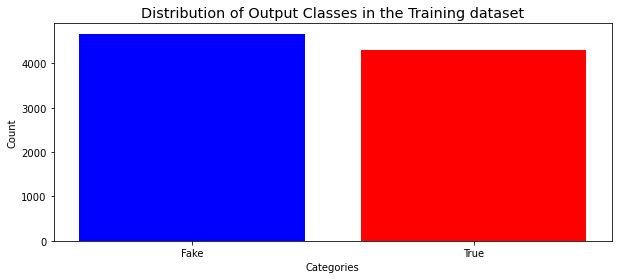

In [33]:
value_counts(counts,["Fake","True"])

## Random Forest

### Cross-Validation

In [34]:
# # https://jamesrledoux.com/code/grid_search
# model_params = {
#     'n_estimators': [50, 150, 250],
#     'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
#     'min_samples_split': [2, 4, 6]
# }

In [35]:
# rf_model = RandomForestClassifier(random_state=1)

In [36]:
# clf = GridSearchCV(rf_model, model_params, cv=5)
# model = clf.fit(X_train, y_train)

In [37]:
# model.best_params_

In [38]:
rf_original=RandomForestClassifier(n_estimators=250, max_features='sqrt', min_samples_split=2)
rf_original.fit(X_train_original,y_train_original)
y_pred_original=rf_original.predict(X_test_original)
print("Accuracy:",metrics.accuracy_score(y_test_original, y_pred_original))

Accuracy: 0.9750556792873051


In [49]:
# feature_importance(rf_original)

### kNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# model_params_knn = {
#     'n_neighbors': [1,3,5,7,9]
# }

In [ ]:
# knn_titan = KNeighborsClassifier()

In [ ]:
# clf_knn = GridSearchCV(knn_titan, model_params_knn, cv=5)
# model_knn_1 = clf_knn.fit(X_train_original, y_train_original)

In [ ]:
# model_knn_1.best_params_
# n_neighbors = 7

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train_original,y_train_original)
y_pred_knn = model_knn.predict(X_test_original)
print("Accuracy:",metrics.accuracy_score(y_test_original, y_pred_knn))

Accuracy: 0.9652561247216036


### SVM

In [43]:
from sklearn.svm import LinearSVC

In [ ]:
# # # https://jamesrledoux.com/code/grid_search
# model_params = {
#     'C': [0.1,1,10,100,1000]
# }

In [ ]:
# svm_og = LinearSVC()

In [ ]:
# clf = GridSearchCV(svm_og, model_params, cv=5)
# model = clf.fit(X_train_original, y_train_original)

In [ ]:
# model.best_params_

In [44]:
svm_og = LinearSVC(C = 1)
svm_og.fit(X_train_original,y_train_original)
y_pred=svm_og.predict(X_test_original)
print("Accuracy:",metrics.accuracy_score(y_test_original, y_pred))

Accuracy: 0.965924276169265


/Users/clodaghlynch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Evaluation

In [50]:
def evaluate_func(y_test, y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_pred))
    print("Accuracy score:")
    print(accuracy_score(y_test, y_pred))
    print("F1 score:")
    print(f1_score(y_test, y_pred, average="binary", pos_label="Fake"))
    print("Precision score:")
    print(precision_score(y_test, y_pred, average="binary", pos_label="Fake"))  
    print("Recall score:")
    print(recall_score(y_test, y_pred, average="binary", pos_label="Fake"))

#### Stratified Baseline Classifier

Confusion Matrix:
[[2469 2201]
 [2192 2118]]
Classification Report:
              precision    recall  f1-score   support

        Fake       0.53      0.53      0.53      4670
        True       0.49      0.49      0.49      4310

    accuracy                           0.51      8980
   macro avg       0.51      0.51      0.51      8980
weighted avg       0.51      0.51      0.51      8980

Accuracy score:
0.5108017817371938
F1 score:
0.5292037295038046
Precision score:
0.529714653507831
Recall score:
0.5286937901498929


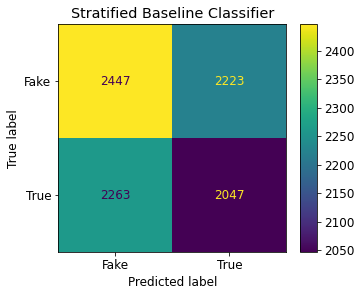

In [61]:
strat_model = DummyClassifier(strategy='stratified').fit(X_train_original, y_train_original)
strat_pred = strat_model.predict(X_test_original)
evaluate_func(y_test_original,strat_pred)
plot_confusion_matrix(strat_model, X_test_original, y_test_original) 
plt.title("Stratified Baseline Classifier")
strat_probs = strat_model.predict_proba(X_test_original)[:,1]

#### Most Frequent Baseline Classifier

Confusion Matrix:
[[4670    0]
 [4310    0]]
Classification Report:


/Users/clodaghlynch/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clodaghlynch/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clodaghlynch/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

        Fake       0.52      1.00      0.68      4670
        True       0.00      0.00      0.00      4310

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.36      8980

Accuracy score:
0.5200445434298441
F1 score:
0.6842490842490841
Precision score:
0.5200445434298441
Recall score:
1.0


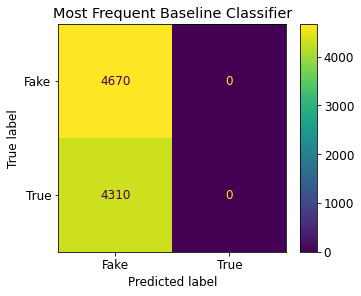

In [62]:
freq_model = DummyClassifier(strategy='most_frequent').fit(X_train_original, y_train_original)
freq_pred = freq_model.predict(X_test_original)
evaluate_func(y_test_original,freq_pred)
plot_confusion_matrix(freq_model, X_test_original, y_test_original)  
plt.title("Most Frequent Baseline Classifier")
freq_probs = freq_model.predict_proba(X_test_original)[:,1]

#### Random Forest

Confusion Matrix:
[[4549  121]
 [ 103 4207]]
Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98      4670
        True       0.97      0.98      0.97      4310

    accuracy                           0.98      8980
   macro avg       0.97      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Accuracy score:
0.9750556792873051
F1 score:
0.9759708217120789
Precision score:
0.9778589853826312
Recall score:
0.9740899357601713


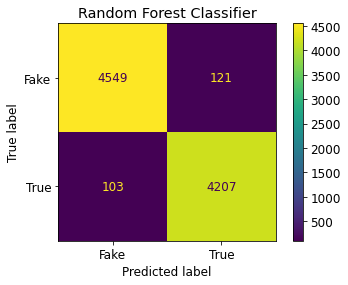

In [51]:
evaluate_func(y_test_original,y_pred_original)
plot_confusion_matrix(rf_original, X_test_original, y_test_original)  
plt.title("Random Forest Classifier")
probs_rf = rf_original.predict_proba(X_test_original)[:,1]

Confusion Matrix:
[[4436  234]
 [  78 4232]]
Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.95      0.97      4670
        True       0.95      0.98      0.96      4310

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

Accuracy score:
0.9652561247216036
F1 score:
0.9660278745644598
Precision score:
0.9827204253433761
Recall score:
0.9498929336188436


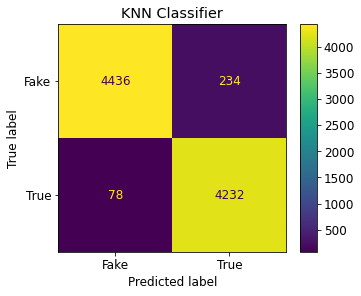

In [59]:
evaluate_func(y_test_original,y_pred_knn)
plot_confusion_matrix(model_knn, X_test_original, y_test_original)  
plt.title("KNN Classifier")
probs_knn = model_knn.predict_proba(X_test_original)[:,1]

Confusion Matrix:
[[4489  181]
 [ 125 4185]]
Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.96      0.97      4670
        True       0.96      0.97      0.96      4310

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

Accuracy score:
0.965924276169265
F1 score:
0.9670400689358035
Precision score:
0.9729085392284352
Recall score:
0.9612419700214133


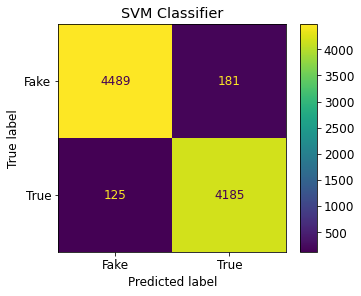

In [60]:
evaluate_func(y_test_original,y_pred)
plot_confusion_matrix(svm_og, X_test_original, y_test_original)  
plt.title("SVM Classifier")
probs_svm = svm_og._predict_proba_lr(X_test_original)[:,1]

### ROC curve

In [57]:
def roc_curve_func(ytest, probs_base, probs_freq, probs_rf, probs_knn, probs_svm):
    fpr_rf, tpr_rf, _ = roc_curve(ytest,probs_rf, pos_label="True")
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    print(roc_auc_rf)
    
    fpr_knn, tpr_knn, _ = roc_curve(ytest,probs_knn, pos_label="True")
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(roc_auc_knn)
    
    fpr_svm, tpr_svm, _ = roc_curve(ytest,probs_svm, pos_label="True")
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    print(roc_auc_svm)
    
    fpr_strat, tpr_strat, _ = roc_curve(ytest,probs_base,pos_label="True")
    roc_auc_base = auc(fpr_strat, tpr_strat)
    print(roc_auc_base)
    
    fpr_freq, tpr_freq, _ = roc_curve(ytest,probs_freq,pos_label="True")
    roc_auc_freq = auc(fpr_freq, tpr_freq)
    print(roc_auc_freq)
    
    plt.rc('font', size=12) 
    plt.rcParams['figure.constrained_layout.use'] = True 
    fig= plt.figure(figsize=(9,6))
    plt.plot(fpr_rf,tpr_rf)
    plt.plot(fpr_knn,tpr_knn)
    plt.plot(fpr_svm,tpr_svm)
    plt.plot(fpr_strat,tpr_strat, color='yellow',linestyle='--')
    plt.plot(fpr_freq,tpr_freq, color = 'black',linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Classification Models")
    plt.legend(["RF", "kNN", "SVM", "Stratified Baseline", "Most Freq Baseline"], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=10)
    plt.show()

0.9959225346164737
0.9891169880314193
0.9951241820973087
0.50266597773218
0.5


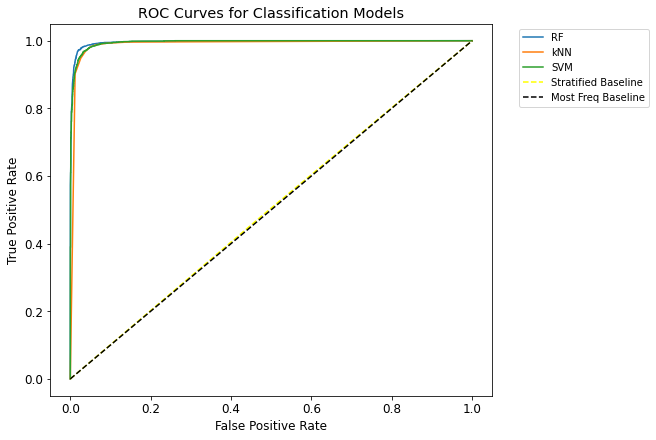

In [58]:
roc_curve_func(y_test_original, strat_probs, freq_probs, probs_rf, probs_knn, probs_svm)

# HYPOTHESIS 2

In [64]:
# for i in range(0,37)
X_new = new.iloc[:, : 38]

In [65]:
X_new.head()

,VBD,VBZ,WDT,DT,CC,POS,RB,PRP,WRB,",",...,WP,TO,VBP,RBR,NNPS,VBN,JJ,VB,FW,Syntax
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1745
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,9176
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,3856
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,13660
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,7795


In [66]:
y_new = new.iloc[:,38].values

In [67]:
y_new

array(['True', 'True', 'True', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [68]:
X_train_new, X_test_new, y_train_new, y_test_new = data_split_func(X_new,y_new)

In [69]:
rf_new=RandomForestClassifier(n_estimators=250, max_features='sqrt', min_samples_split=2)
rf_new.fit(X_train_new,y_train_new)
y_pred_new=rf_new.predict(X_test_new)
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy: 0.977728285077951


In [72]:
knn_new = KNeighborsClassifier(n_neighbors=7)
knn_new.fit(X_train_new,y_train_new)
y_pred_knn_new = knn_new.predict(X_test_new)
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_knn_new))

Accuracy: 0.9233853006681515


In [73]:
svm_new = LinearSVC(C = 1)
svm_new.fit(X_train_new,y_train_new)
y_pred_svm_new=svm_new.predict(X_test_new)
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_svm_new))

Accuracy: 0.9143652561247216


/Users/clodaghlynch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Statistical Difference

In [74]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

### RF

In [75]:
# evaluate model 1
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores1 = cross_val_score(rf_original, X_original, y_original, scoring='accuracy', cv=cv1, n_jobs=-1)
print('RF Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

RF Cross Val Mean Accuracy: 0.975 (0.002)


In [76]:
# evaluate model 2=
# cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores2 = cross_val_score(rf_new, X_new, y_new, scoring='accuracy', cv=cv1, n_jobs=-1)
print('RF Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

RF Cross Val Mean Accuracy: 0.978 (0.001)


In [80]:
from scipy.stats import ttest_ind
import numpy as np

print("Model 1 mean value:",mean(scores1))
print("Model 2 mean value:",mean(scores2))

print("Model 1 std value:",std(scores1))
print("Model 2 std value:",std(scores2))

ttest,pval = ttest_ind(scores1,scores2)

print("p-value",pval)

if pval <= 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Model 1 mean value: 0.9752178939673889
Model 2 mean value: 0.9784029046410609
Model 1 std value: 0.0015479228897418535
Model 2 std value: 0.0014023329070708868
p-value 4.052795969316894e-06
we reject null hypothesis


### kNN

In [78]:
# evaluate model 1
# cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores1_knn = cross_val_score(model_knn, X_original, y_original, scoring='accuracy', cv=cv1, n_jobs=-1)
print('kNN Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores1_knn), std(scores1_knn)))

RF Cross Val Mean Accuracy: 0.965 (0.002)


In [79]:
# evaluate model 2=
# cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores2_knn = cross_val_score(knn_new, X_new, y_new, scoring='accuracy', cv=cv1, n_jobs=-1)
print('kNN Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores2_knn), std(scores2_knn)))

kNN Cross Val Mean Accuracy: 0.920 (0.002)


In [87]:
from scipy.stats import ttest_ind
import numpy as np
print("Model _knn 1 mean value:",mean(scores1_knn))
print("Model _knn 2 mean value:",mean(scores2_knn))
print("Model _knn 1 std value:",std(scores1_knn))
print("Model _knn 2 std value:",std(scores2_knn))
ttest,pval = ttest_ind(scores1_knn,scores2_knn)
print("p-value",pval)
if pval <= 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Model _knn 1 mean value: 0.9650986674921512
Model _knn 2 mean value: 0.9204048297797558
Model _knn 1 std value: 0.00207813803869792
Model _knn 2 std value: 0.0022806879796229596
p-value 6.718207898915316e-30
we reject null hypothesis


### SVM

In [82]:
# evaluate model 1
# cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores1_svm = cross_val_score(svm_og, X_original, y_original, scoring='accuracy', cv=cv1, n_jobs=-1)
print('SVM Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores1_svm), std(scores1_svm)))

SVM Cross Val Mean Accuracy: 0.969 (0.002)


In [83]:
# evaluate model 2=
# cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores2_svm = cross_val_score(svm_new, X_new, y_new, scoring='accuracy', cv=cv1, n_jobs=-1)
print('SVM Cross Val Mean Accuracy: %.3f (%.3f)' % (mean(scores2_svm), std(scores2_svm)))

SVM Cross Val Mean Accuracy: 0.849 (0.116)


In [85]:
from scipy.stats import ttest_ind
import numpy as np
print("Model _knn 1 mean value:",mean(scores1_svm))
print("Model _knn 2 mean value:",mean(scores2_svm))
print("Model _knn 1 std value:",std(scores1_svm))
print("Model _knn 2 std value:",std(scores2_svm))
ttest,pval = ttest_ind(scores1_svm,scores2_svm)
print("p-value",pval)
if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Model _knn 1 mean value: 0.969078049226964
Model _knn 2 mean value: 0.8493685521930119
Model _knn 1 std value: 0.0016193912939637875
Model _knn 2 std value: 0.11571485692912006
p-value 0.0005940964511840209
we reject null hypothesis
